#HERE WE USE BINARY CLASSIFICATION FOR PREDICTING WHEATHER THE PERSON IS AFFECTED OR NOT USING 9 DIFFERENT FEATURES

Imprting all required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


loading the dataset

In [2]:
df=pd.read_csv('diabetes.csv')

Data analysis and Preprocessing and cleaning of the Data set

In [3]:
print(df.head())
print(df.tail())#display the first five rows and last five rows of the data set respectively

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766    

In [4]:
df.shape #for shape or size of our data set

(768, 9)

In [5]:
df.dtypes #it gives the datatypes of all column

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.info() #to check the information of tha dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe() #it gives the statical summary of the data set like mean median mode etc.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data Cleaning

In [33]:
df.drop_duplicates() # to drop duplicates values in the dataset and check shape again to get knowledeg of dropped rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [9]:
df.isnull().sum() #to check the null values in every column

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.columns # to get all the header of the coloumns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
#to print the number of zeroes in the respective coloumns
print('No. of Zero values in Glucose',df[df['Glucose']==0].shape[0])
print('No. of Zero values in BloodPressure',df[df['BloodPressure']==0].shape[0])
print('No. of Zero values in SkinThickness',df[df['SkinThickness']==0].shape[0])
print('No. of Zero values in Insulin',df[df['Insulin']==0].shape[0])
print('No. of Zero values in BMI',df[df['BMI']==0].shape[0])

No. of Zero values in Glucose 5
No. of Zero values in BloodPressure 35
No. of Zero values in SkinThickness 227
No. of Zero values in Insulin 374
No. of Zero values in BMI 11


So we have to replace the zero value with the mean of the dataset

In [12]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data Visualization

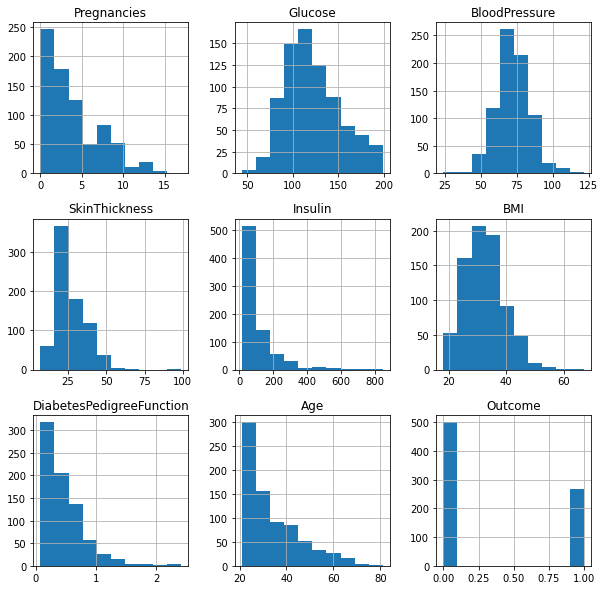

In [14]:
df.hist(bins=10,figsize=(10,10)) #histogram is used to check the skewness of dataset
plt.show()

array([[<AxesSubplot:xlabel='Pregnancies', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Glucose', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='SkinThickness', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='BMI', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Age', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>],
       [<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Glucose', ylabel='Glucose'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Glucose'>,
        <AxesSubplot:xlabel='SkinThickness', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Glucose'>,
        <AxesSubplot:xlabel='BMI', ylabel='Glucose'>,
        <AxesSubplot:xlabel='DiabetesPedigreeFunction', 

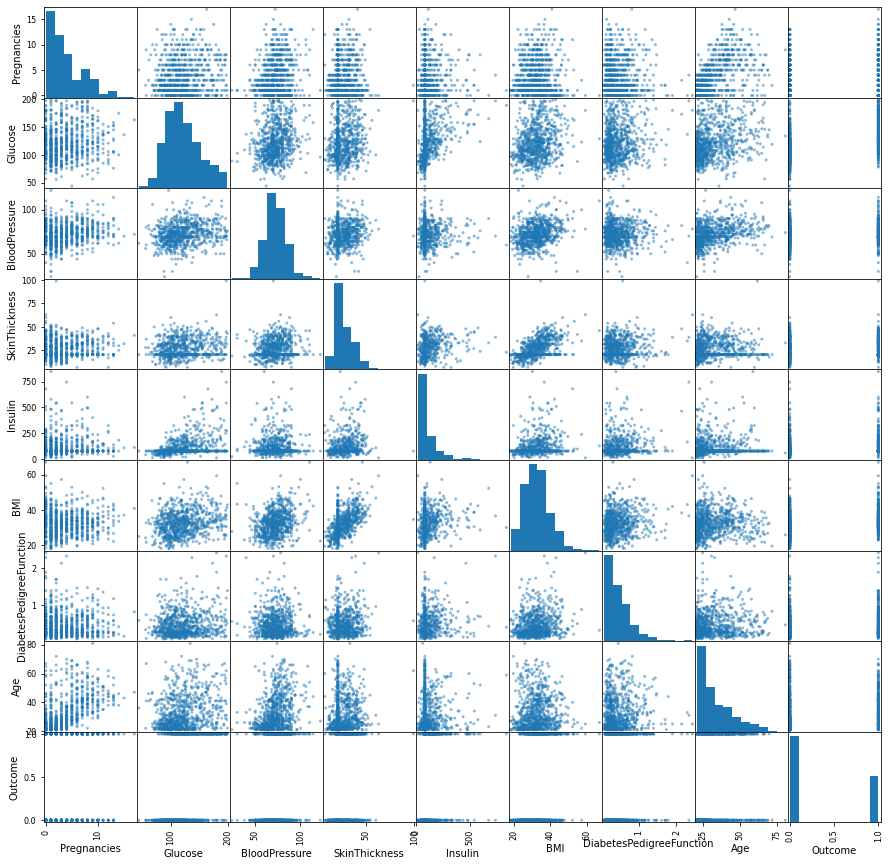

In [15]:
from pandas.plotting import scatter_matrix ##Sacter plot to know the relationship btw two variables
scatter_matrix(df,figsize=(15,15))

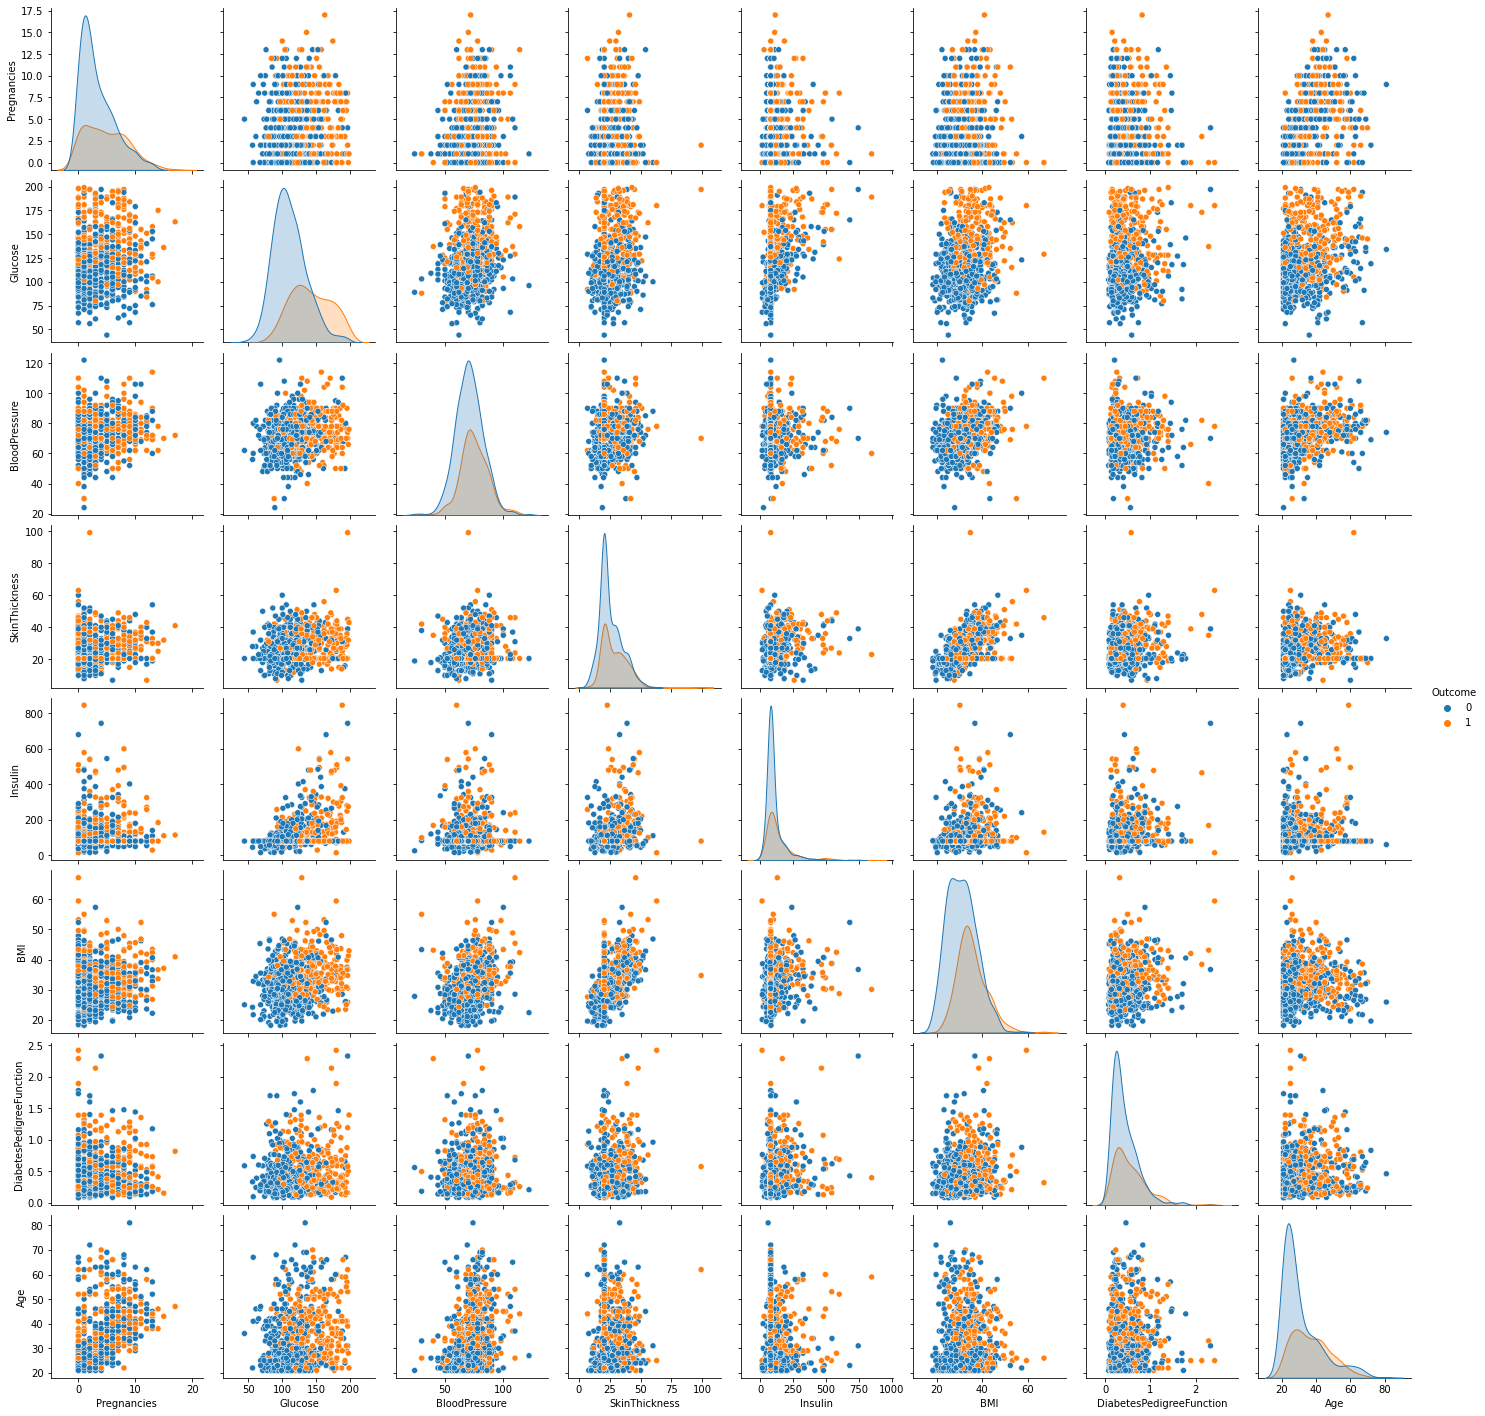

In [16]:
sns.pairplot(data=df,hue='Outcome') #another plot to create scatterplot btw all your variables
plt.show()

Analysing the Co-realtion Btw Variables

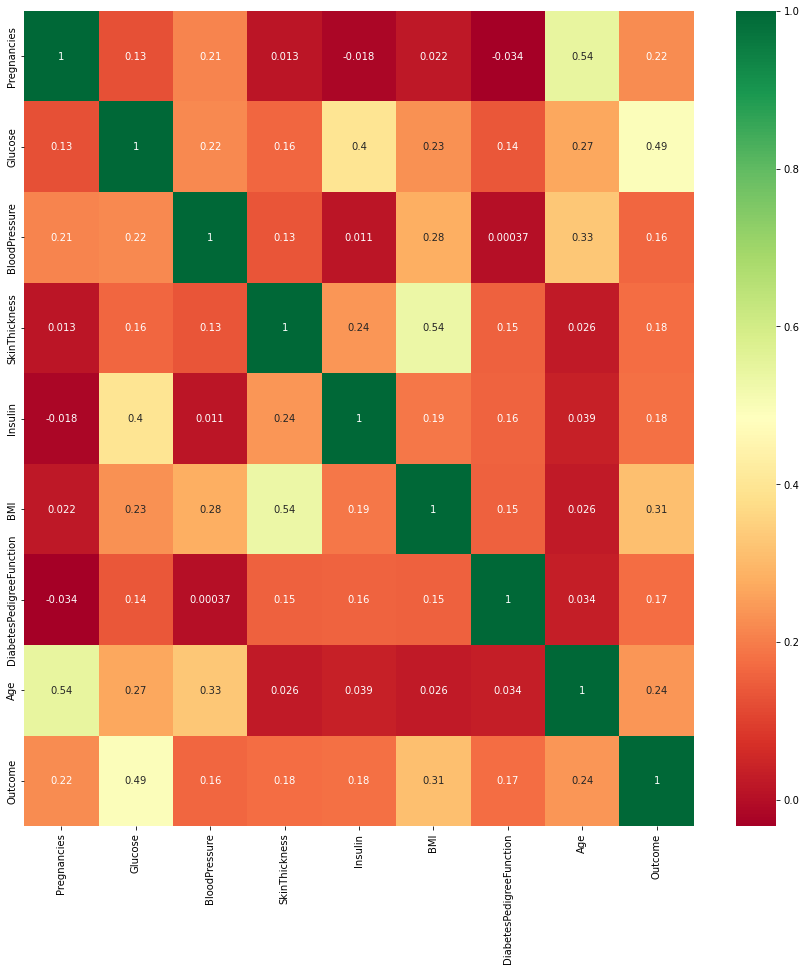

In [17]:
cor=df.corr()
top_cor_featuress=cor.index
plt.figure(figsize=(15,15))
p=sns.heatmap(df[top_cor_featuress].corr(),annot=True,cmap="RdYlGn") 

In [18]:
Target="Outcome" #here we seprate our target value and feature
v=df[Target] #target value
u=df.drop(Target,axis=1) #rest of 8 features

In [19]:
u.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


Train test Split

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(u,v,test_size=0.3,random_state=123)
print(u.shape)
print(x_train.shape)
print(x_test.shape)

(768, 8)
(537, 8)
(231, 8)


Applying The classification Algorithms

In [21]:
from sklearn.linear_model import LogisticRegression
linreg=LogisticRegression()
linreg.fit(x_train,y_train)

c:\Users\Harsh tyagi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [23]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)

SVC()

Making Prediction Now

In [24]:
x_test.shape #checking shape of test data set before prediction

(231, 8)

In [25]:
linreg_pred=linreg.predict(x_test) #By logistic Regression
linreg_pred.shape

(231,)

In [26]:
KNN_pred=KNN.predict(x_test) #by K nearest neighbours
svm_pred=svm.predict(x_test) #by support Vector Machine

Evaluation of the Model

In [27]:
#Accuracy score of the Logistic Regression
from sklearn.metrics import accuracy_score
print('Train ACCURACY Of Logistic Regression',linreg.score(x_train,y_train)*100)
print('Test ACCURACY Of Logistic Regression',linreg.score(x_test,y_test)*100)
print(' overall --ACCURACY--  Of Logistic Regression',accuracy_score(y_test,linreg_pred)*100)

Train ACCURACY Of Logistic Regression 76.53631284916202
Test ACCURACY Of Logistic Regression 80.08658008658008
 overall --ACCURACY--  Of Logistic Regression 80.08658008658008


In [28]:
#Accuracy score of the KNN
print('Train ACCURACY Of KNN',KNN.score(x_train,y_train)*100)
print('Test ACCURACY Of KNN',KNN.score(x_test,y_test)*100)
print(' overall --ACCURACY--  Of KNN',accuracy_score(y_test,KNN_pred)*100)

Train ACCURACY Of KNN 82.49534450651768
Test ACCURACY Of KNN 73.59307359307358
 overall --ACCURACY--  Of KNN 73.59307359307358


In [29]:
#Accuracy score of the SVM
print('Train ACCURACY Of SVM',svm.score(x_train,y_train)*100)
print('Test ACCURACY Of SVM',svm.score(x_test,y_test)*100)
print(' overall --ACCURACY--  Of SVM',accuracy_score(y_test,svm_pred)*100)

Train ACCURACY Of SVM 75.41899441340783
Test ACCURACY Of SVM 77.92207792207793
 overall --ACCURACY--  Of SVM 77.92207792207793


Confusion Matrix for all models

<AxesSubplot:>

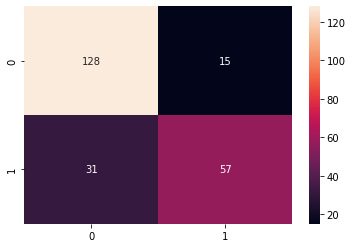

In [30]:

from sklearn.metrics import classification_report,confusion_matrix
#for Logistic Regression
sns.heatmap(confusion_matrix(y_test,linreg_pred),annot=True,fmt="d")

<AxesSubplot:>

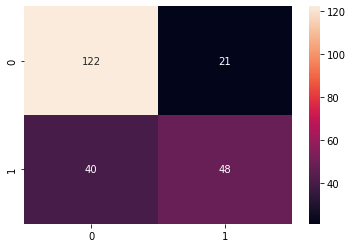

In [31]:
#for KNN
sns.heatmap(confusion_matrix(y_test,KNN_pred),annot=True,fmt="d")

<AxesSubplot:>

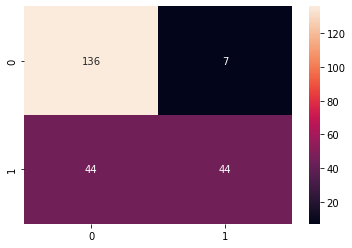

In [32]:
#for Support vector mAchine
sns.heatmap(confusion_matrix(y_test,svm_pred),annot=True,fmt="d")